### a.

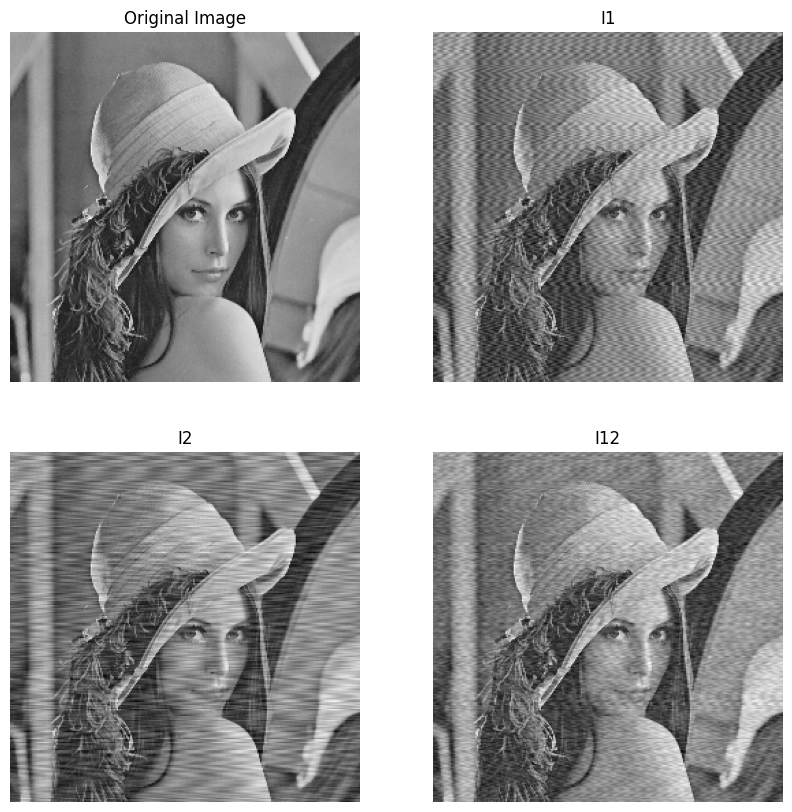

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to generate random harmonic noise vectors
def generate_noise(frequency, image_shape, mu, sigma):
    A = np.random.normal(mu, sigma, image_shape[0])
    phi = np.random.uniform(0, 2*np.pi, image_shape[0])
    r = np.zeros(image_shape)
    for i in range(image_shape[0]):
        for j in range(image_shape[1]):
            r[i, j] = A[i] * np.cos(2 * np.pi * frequency * j + phi[i])
    return r

# Load the image from a specified path
image_path = '/content/8-bit-256-x-256-Grayscale-Lena-Image.png'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255.0  # Normalize to [0, 1]

image_shape = I.shape
f1 = 1/8
f2 = 1/32
mu = 1/10
sigma = 1/20

# Generate the noisy images
r1 = generate_noise(f1, image_shape, mu, sigma)
r2 = generate_noise(f2, image_shape, mu, sigma)

I1 = I + r1
I2 = I + r2
I12 = (I1 + I2) / 2

# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(I, cmap='gray')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(I1, cmap='gray')
axs[0, 1].set_title('I1')

axs[1, 0].imshow(I2, cmap='gray')
axs[1, 0].set_title('I2')

axs[1, 1].imshow(I12, cmap='gray')
axs[1, 1].set_title('I12')

for ax in axs.flat:
    ax.axis('off')

plt.show()


### b.

Let's define \( u = f \cdot n \).

$
\phi_{I_{(t,j)}^{\text{noisy}}}^F = \phi_{I_t^{\text{noisy}}}^F (j) = \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t^{\text{noisy}} (k)
$

$
= \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot \left( I_t (k) + A_t \cdot \cos(2 \pi fk + \phi_t ) \right)
$

$
= \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t (k) + \frac{1}{2 \sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot A_t \cdot \left( e^{i \frac{2 \pi}{n} u k + i \phi_t} + e^{-i \frac{2 \pi}{n} u k - i \phi_t} \right)
$

$
= \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t (k) + \frac{1}{2 \sqrt{n}} \sum_{k=0}^{n-1} A_t \cdot \left( W^* \right)^{(j \cdot k)} \cdot \left( W^{(u \cdot k)} \cdot e^{i \phi_t} + W^{-(u \cdot k)} \cdot e^{-i \phi_t} \right)
$

$
= \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t (k) + \frac{(A_t e^{i \phi_t})}{2 \sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{(u \cdot k)} + \frac{(A_t e^{-i \phi_t})}{2 \sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{-(u \cdot k)}
$

For

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{(u \cdot k)}:
$


If \( u = j \):

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{(u \cdot k)} = \sum_{k=0}^{n-1} W^0 = n
$

Else:

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{(u \cdot k)} = \sum_{k=0}^{n-1} \left( W^* \right)^{(j-u)k} = \frac{\left( W^* \right)^{(j-u)n} - 1}{\left( W^* \right)^{(j-u)} - 1} = \frac{(1)^{(j-u)} - 1}{\left( W^* \right)^{(j-u)} - 1} = 0
$

For

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{-(u \cdot k)}:
$

If \( u = -j \):

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{-(u \cdot k)} = \sum_{k=0}^{n-1} W^0 = n
$

Else:

$
\sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot W^{-(u \cdot k)} = \sum_{k=0}^{n-1} \left( W^* \right)^{(-j-u)k} = \frac{\left( W^* \right)^{(-j-u)n} - 1}{\left( W^* \right)^{(-j-u)} - 1} = \frac{(1)^{(-j-u)} - 1}{\left( W^* \right)^{(-j-u)} - 1} = 0
$

Therefore,

$
\phi_{I_{(t,j)}^{\text{noisy}}}^F = \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t (k) + \frac{(A_t e^{i \phi_t}) \sqrt{n}}{2} \cdot \delta_{j, f \cdot n} + \frac{(A_t e^{-i \phi_t}) \sqrt{n}}{2} \cdot \delta_{j, -f \cdot n}
$


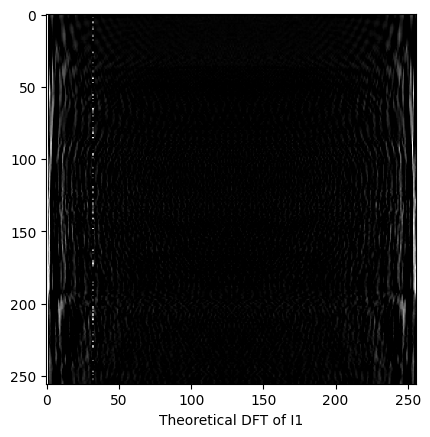

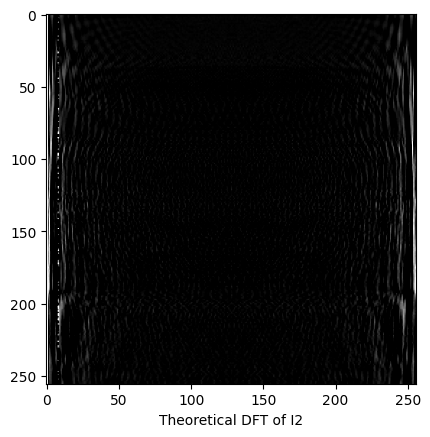

In [23]:
import math
from numpy.lib.type_check import real

def DFTPhotoPrint(DFT_I, title):
  plt.imshow(np.real(DFT_I), cmap='gray', vmin=0, vmax=1)
  plt.xlabel(title)
  plt.show()


A = np.random.normal(1/10, 1/20, 256)
phi = np.random.uniform(0,2*math.pi, 256)

def theoretical_DFT(I, f, A=A, phi=phi) :
  n = np.shape(I)[0]
  In = np.zeros((n,n))
  for i in range(n) :
    for j in range(n) :
      val = 0
      for k in range(n) :
        val += math.e**(complex(0,-2*math.pi*j*k/n))*I[i][k]
      In[i][j] = real(val/math.sqrt(n) + (A[i]*math.e**(complex(0, phi[i]))*math.sqrt(n)/2)*(j == f*n) + (A[i]*math.e**(complex(0, -phi[i]))*math.sqrt(n)/2)*(j == -f*n))
  return In

In1 = theoretical_DFT(I, 1/8)
In2 = theoretical_DFT(I, 1/32)

DFTPhotoPrint(In1, 'Theoretical DFT of I1')
DFTPhotoPrint(In2, 'Theoretical DFT of I2')

### c.

Denote the weight of noise 1: $w_1$, the weight of noise 2: $w_2$.

$
\phi_{I_{(t,j)}^{\text{noisy}}}^F = \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \left( I_t (k) + \frac{w_1 \cdot A_t^{(1)} \cdot \cos(2 \pi f^{(1)} k + \phi_t^{(1)})}{w_1 + w_2} + \frac{w_2 \cdot A_t^{(2)} \cdot \cos(2 \pi f^{(2)} k + \phi_t^{(2)})}{w_1 + w_2} \right)
$

$
= \frac{1}{\sqrt{n}} \sum_{k=0}^{n-1} \left( W^* \right)^{(j \cdot k)} \cdot I_t (k) + \frac{w_1 A_t^{(1)} e^{i \phi_t^{(1)}} \sqrt{n}}{2 (w_1 + w_2)} \cdot \delta_{j, f^{(1)} \cdot n} + \frac{w_2 A_t^{(2)} e^{i \phi_t^{(2)}} \sqrt{n}}{2 (w_1 + w_2)} \cdot \delta_{j, f^{(2)} \cdot n} + \frac{w_1 A_t^{(1)} e^{-i \phi_t^{(1)}} \sqrt{n}}{2 (w_1 + w_2)} \cdot \delta_{j, -f^{(1)} \cdot n} + \frac{w_2 A_t^{(2)} e^{-i \phi_t^{(2)}} \sqrt{n}}{2 (w_1 + w_2)} \cdot \delta_{j, -f^{(2)} \cdot n}
$\\


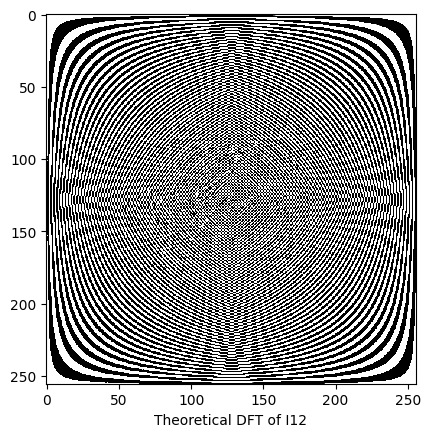

In [24]:
def theoretical_DFT_weighted(I, f1=1/8, f2=1/32, w1=1/2, w2=1/2) :
  A1 = np.random.normal(1/10, 1/20, 256)
  phi1 = np.random.uniform(0,2*math.pi, 256)
  A2 = np.random.normal(1/10, 1/20, 256)
  phi2 = np.random.uniform(0,2*math.pi, 256)
  n = I.shape[0]
  In = np.zeros((n,n))
  w = w1 + w2
  W = math.e**(complex(0, -1) * 2 * math.pi / n)
  for i in range(n) :
    for j in range(n) :
      val = 0
      for k in range(n) :
        val+= (W**(i*j))*I[i][j]
      In[i][j] =real(val + ((w1*A1[i]*math.e**(complex(0, phi1[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==f1*n) + ((w2*A2[i]*math.e**(complex(0, phi2[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==f2*n) + ((w1*A1[i]*math.e**(complex(0, -phi1[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==-f1*n) + ((w2*A2[i]*math.e**(complex(0, -phi2[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==-f2*n))
  return In

In12_w = theoretical_DFT_weighted(I)
DFTPhotoPrint(In12_w, 'Theoretical DFT of I12')

### d.

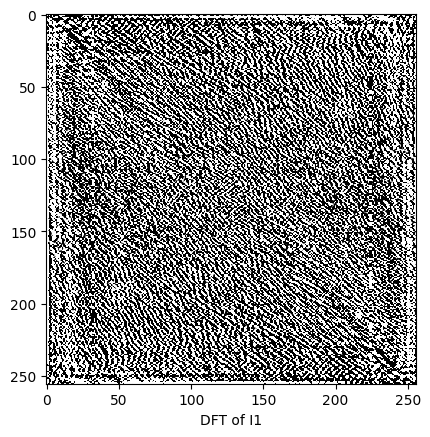

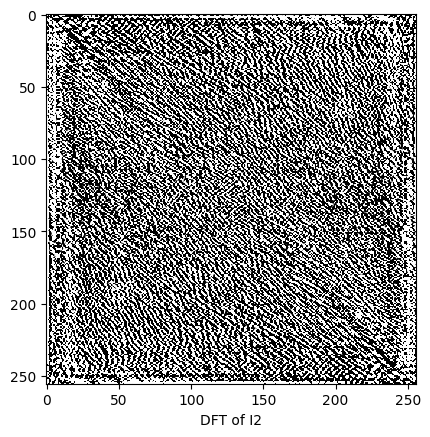

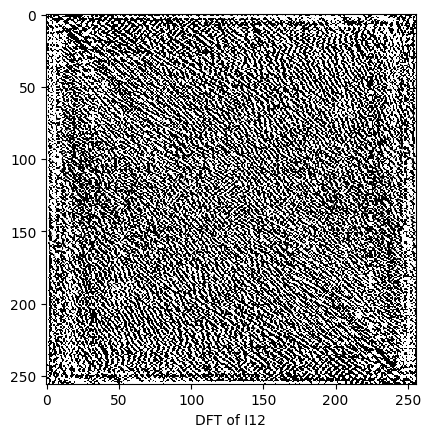

In [25]:
def DFT_Matrix() :
  n = 256
  return np.array([[math.e**(complex(0,-2*math.pi*k*j/n)) for k in range(n)] for j in range(n)])

DFT_I1 = np.dot(np.dot(DFT_Matrix(), I1), DFT_Matrix())
DFT_I2 = np.dot(np.dot(DFT_Matrix(), I2), DFT_Matrix())
DFT_I12 = np.dot(np.dot(DFT_Matrix(), I12), DFT_Matrix())

DFTPhotoPrint(DFT_I1, 'DFT of I1')
DFTPhotoPrint(DFT_I2, 'DFT of I2')
DFTPhotoPrint(DFT_I12, 'DFT of I12')


### e.

In [26]:
def plot_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

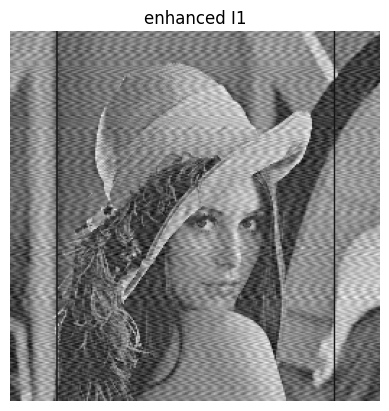

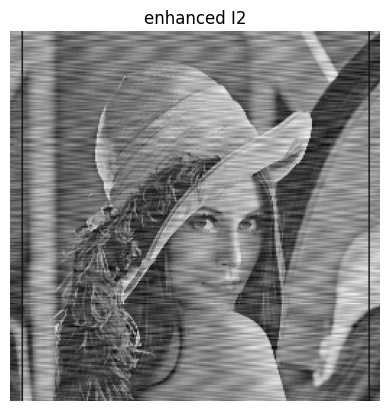

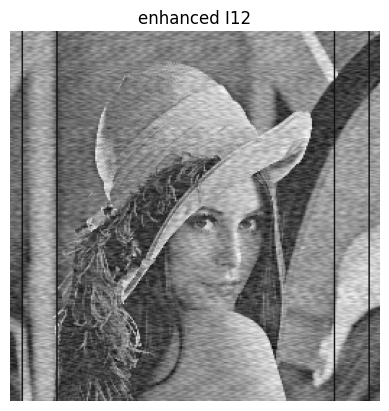

MSE of I1: 0.0018048287446828372
MSE of I2: 0.0020889861671877863
MSE of I12: 0.003867068582472144


In [27]:
from numpy.ma.extras import intersect1d

def filter(I, f) :
    n = I.shape[0]
    I_copy = I.copy()
    freq_pos = int(n // (1 / f))
    freq_neg = int(n - (n // (1 / f)))

    # Check if the calculated indices are within the valid range
    if freq_pos < n:
        I_copy[:, freq_pos] = 0
    if freq_neg < n:
        I_copy[:, freq_neg] = 0

    return I_copy

I1_enhanced = filter(I1, f1)
I2_enhanced = filter(I2, f2)
I12_enhanced = filter(filter(I12, f1), f2)

plot_image(I1_enhanced,"enhanced I1")
plot_image(I2_enhanced,"enhanced I2")
plot_image(I12_enhanced, "enhanced I12")

# Compute the MSE of the reconstructions
def compute_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

mse_I1 = compute_mse(I1, I1_enhanced)
mse_I2 = compute_mse(I2, I2_enhanced)
mse_I12 = compute_mse(I12, I12_enhanced)

print(f"MSE of I1: {mse_I1}")
print(f"MSE of I2: {mse_I2}")
print(f"MSE of I12: {mse_I12}")

We can see that the filter almost didnt change the noised images, as the MSE is very low.
The MSE of I12 seems to be equal to MSE of I1 + MSE of I2, which make sense because we zero out both frequencies while filtering I12.